In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error as mse
df = pd.read_csv("Transformed_Housing_Data2.csv")
data = df.copy()

In [2]:
data["Sale_Price"].max(),data["Sale_Price"].min()

(np.float64(1129575.0), np.float64(75000.0))

# spliting the independent and dependent varible

In [3]:
y = data.iloc[:,0]
x = data.iloc[:,1:31]

x.head(5)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


# test and train data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)  #x = indenpendent y = dependent 

In [6]:
x_train.shape

(15126, 30)

In [7]:
x_test.shape

(6483, 30)

In [8]:
y_train.shape

(15126,)

In [9]:
y_test.shape

(6483,)

# Standarized

In [10]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [11]:
x_train = scale.fit_transform(x_train)

In [12]:
x_train

array([[ 0.67037655,  0.49568996,  0.53216539, ..., -0.11157867,
        -0.17146357, -0.04604398],
       [-0.39970742,  1.14699349,  1.46110449, ..., -0.11157867,
        -0.17146357, -0.04604398],
       [-0.39970742,  0.82134172,  0.510308  , ..., -0.11157867,
        -0.17146357, -0.04604398],
       ...,
       [-1.46979138, -0.80691711, -0.46234587, ..., -0.11157867,
        -0.17146357, -0.04604398],
       [ 0.67037655,  0.49568996,  1.01302798, ..., -0.11157867,
        -0.17146357, -0.04604398],
       [ 2.81054447,  1.14699349,  0.95838451, ..., -0.11157867,
        -0.17146357, -0.04604398]])

In [13]:
x_test = scale.fit_transform(x_test)

In [14]:
x_test

array([[-0.39644466,  0.51112674, -0.78022039, ..., -0.11388042,
        -0.16260623, -0.05276573],
       [-0.39644466,  0.51112674,  0.26735514, ..., -0.11388042,
        -0.16260623, -0.05276573],
       [-1.48456945, -1.42308943, -1.26620903, ..., -0.11388042,
        -0.16260623, -0.05276573],
       ...,
       [ 1.77980491,  0.8334961 , -0.11063603, ..., -0.11388042,
        -0.16260623, -0.05276573],
       [-1.48456945, -1.42308943, -0.99621534, ..., -0.11388042,
        -0.16260623, -0.05276573],
       [ 0.69168012,  1.47823483,  2.14651125, ..., -0.11388042,
        -0.16260623, -0.05276573]])

# first predicting model

In [15]:
data["mean_sale"] = data["Sale_Price"].mean()


<function matplotlib.pyplot.show(close=None, block=None)>

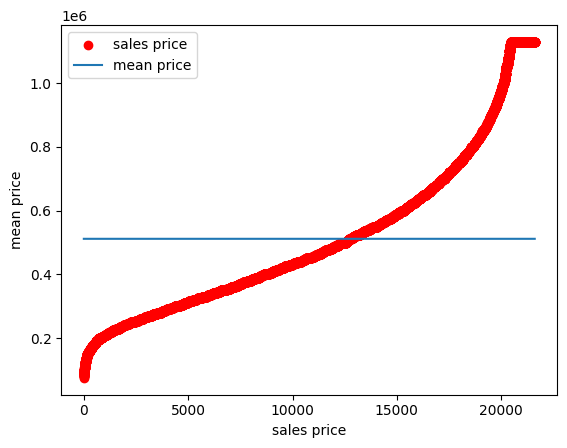

In [16]:
k = range(len(data))
plt.scatter(k,data["Sale_Price"].sort_values(), color = "red",label = "sales price")
plt.plot(k,data["mean_sale"].sort_values(),label = "mean price")
plt.xlabel("sales price")
plt.ylabel("mean price")
plt.legend()
plt.show

In [17]:
grade_mean  = data.pivot_table(values = "Sale_Price", columns = "Overall Grade",aggfunc = np.mean)
print(grade_mean)


Overall Grade        1          2              3              4   \
Sale_Price     142000.0  1129575.0  205666.666667  214381.034483   

Overall Grade             5             6              7              8   \
Sale_Price     248523.971074  301882.01472  402239.619779  537584.082097   

Overall Grade             9              10  
Sale_Price     736936.769025  960408.078866  


C:\Users\venka\AppData\Local\Temp\ipykernel_10884\2702652684.py:1: FutureWarning: The provided callable <function mean at 0x0000027BDB5E8C20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grade_mean  = data.pivot_table(values = "Sale_Price", columns = "Overall Grade",aggfunc = np.mean)


data["grade_mean"] = 0
for i in grade_mean.columns:
    data["grade_mean"][data["Overall Grade"] == i] = grade_mean[i][0]
data["grade_mean"]


In [18]:
#Linear regresssion
Sale_price = data["Sale_Price"].head(30)
Flat_Area = data["Flat Area (in Sqft)"].head(30)
sample_data = pd.DataFrame({"Sale_price":Sale_price,"Flat_Area":Flat_Area})
sample_data["mean"] = sample_data.Sale_price.mean()
sample_data

,Sale_price,Flat_Area,mean
0,221900.0,1180.0,466003.333333
1,538000.0,2570.0,466003.333333
2,180000.0,770.0,466003.333333
3,604000.0,1960.0,466003.333333
4,510000.0,1680.0,466003.333333
5,1129575.0,5420.0,466003.333333
6,257500.0,1715.0,466003.333333
7,291850.0,1060.0,466003.333333
8,229500.0,1780.0,466003.333333
9,323000.0,1890.0,466003.333333


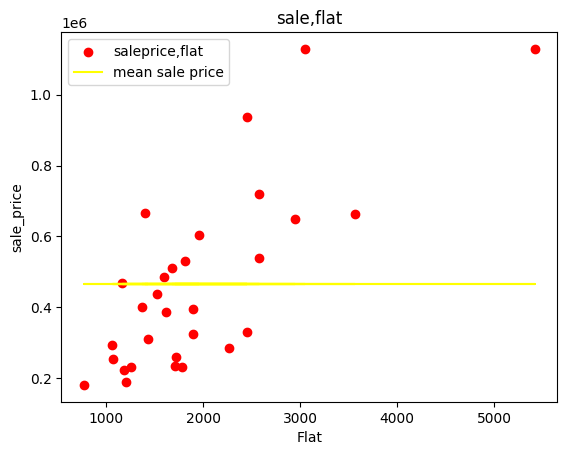

In [19]:
plt.figure(dpi = 100)
plt.scatter(sample_data.Flat_Area,sample_data.Sale_price,color = "red",label = "saleprice,flat")
plt.plot(sample_data.Flat_Area,sample_data["mean"],color = "yellow",label = "mean sale price")
plt.xlabel("Flat")
plt.ylabel("sale_price")
plt.title("sale,flat")
plt.legend()


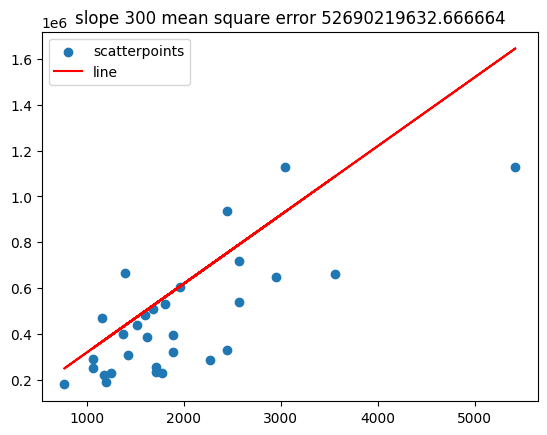

In [20]:
# y = mx+c m = slope c = baised (y axis moving point)
m = 300
c = 19199
line = []
for i in range (len(sample_data)):
    line.append(sample_data.Flat_Area[i] * m + c)
plt.scatter(sample_data.Flat_Area,sample_data.Sale_price, label = "scatterpoints")
plt.plot(sample_data.Flat_Area,line,label = "line",color = "red")
MSE = mse(sample_data.Sale_price,line)
plt.title("slope "+str(m)+ " mean square error " + str(MSE))
plt.legend()

In [21]:

def slope_error(slope, intercept, sample_data):
    line = []
    for i in range(len(sample_data.Flat_Area)):
        tmp = sample_data.Flat_Area[i]* slope +intercept
        line.append(tmp)
    MSE = mse(sample_data.Sale_price,line)
    return MSE


In [22]:
#optional =  beacuse we can able to find the error min value in the grape  
Cost = []
slope = [i/10 for i in range (0,5000)]
for i in slope:
    cost = slope_error(slope = i,intercept = 0,sample_data = sample_data)
    Cost.append(cost)

cost_table = pd.DataFrame({
    "slope" : slope,
    "Cost" : Cost})
cost_table.head()
 

,slope,Cost
0,0.0,2.813721e+11
1,0.1,2.811558e+11
2,0.2,2.809395e+11
3,0.3,2.807234e+11
4,0.4,2.805073e+11


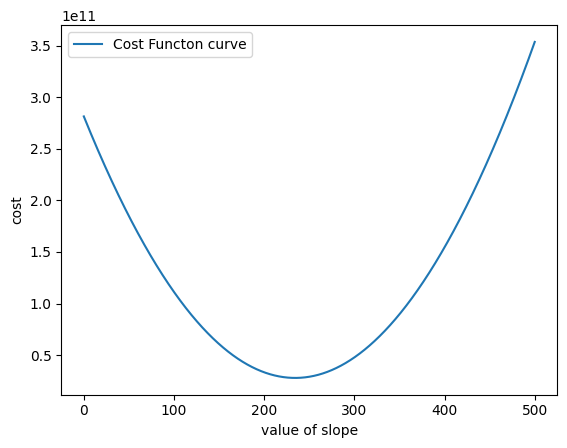

In [23]:
#optional =  beacuse we can able to find the error min value in the grape  
plt.plot(cost_table.slope,cost_table.Cost,label = "Cost Functon curve")
plt.xlabel("value of slope")
plt.ylabel("cost")
plt.legend()

In [24]:
def intercept_error(slope, intercept, sample_data):
    line = []
    for i in range(len(sample_data.Flat_Area)):
        tmp = sample_data.Flat_Area[i]* slope +intercept
        line.append(tmp)
    MSE = mse(sample_data.Sale_price,line)
    return MSE


In [25]:
intercept = [i for i in range (5000,50000)]
Cost = []
for i in intercept:
    cost = (intercept_error(slope = 234, intercept = i, sample_data = sample_data))
    Cost.append(cost)

cost_table = pd.DataFrame({
    "intercept" : intercept,
    "Cost" : Cost})
cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


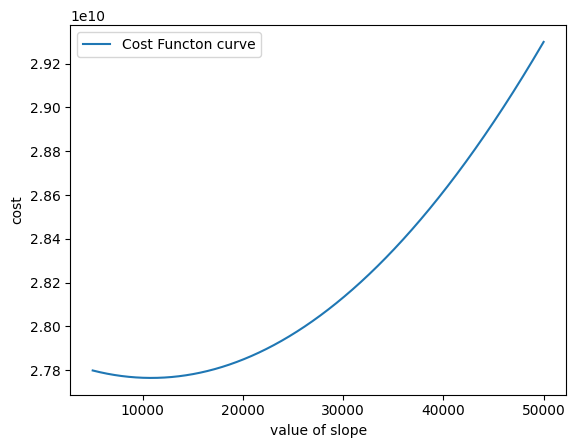

In [26]:
plt.plot(cost_table.intercept,cost_table.Cost,label = "Cost Functon curve")
plt.xlabel("value of slope")
plt.ylabel("cost")
plt.legend()

In [27]:
# Gradial alogorithm important 

In [28]:
def param_int(y):
    m = 0.1
    c = y.mean()
    return m,c  

In [29]:
def genarate_pred(m,c,X):
    predictions = []
    for x in X:
        tmp = (m*x)+c
        predictions.append(tmp)
    return predictions 

In [30]:
def compute_cost(predictions,y):
    cost = np.sum(((predictions-y)**2)/len(y))
    return cost

In [31]:
def gradients(predictions, y, X):
    n = len(y)
    gm = 2/n * np.sum((predictions - y) * X)
    gc = 2/n * np.sum((predictions - y))
    return gm, gc

In [32]:
def param_update(m_old, c_old, gm_old, gc_old, alpha):
    m_new = m_old - alpha * gm_old
    c_new = c_old - alpha * gc_old
    return m_new, c_new

In [ ]:
def result(m, c, X, y, cost, predictions, i):
    if i < max_iter - 1: # type: ignore
        print("Gradient descent has converged at iteration{}".format(i))
    else:
        print("result after",max_iter,"iteration is :") # type: ignore


    plt.figure(figsize = (14,7),dpi = 120)
    plt.scatter(X,y, color = "red", label = "data points")
    label = "final regression line: m = {}; c = {}".format(str(m), str(c))
    plt.plot(X, predictions, color = "green", label = label)
    plt.xlabel("flat_area")
    plt.ylabel("sale price")
    plt.title("final regresssion line")
    plt.legend()

after Iteration 0 :m =  0.11316346413633305 ;c =  1.1849780416165836e-16 ; cost=  0.85836535863667
after Iteration 20 :m =  0.3275595607435688 ;c =  1.240489192847842e-16 ; cost=  0.6182472245590185
after Iteration 40 :m =  0.4706921039517346 ;c =  1.3248661427193537e-16 ; cost=  0.5112264752046607
after Iteration 60 :m =  0.5662485308150865 ;c =  1.415904430738617e-16 ; cost=  0.46352728398628984
after Iteration 80 :m =  0.6300427631414932 ;c =  1.4951003398285442e-16 ; cost=  0.4422677351921283
after Iteration 100 :m =  0.6726323011945988 ;c =  1.611303683072644e-16 ; cost=  0.4327923457067555
after Iteration 120 :m =  0.7010654163122192 ;c =  1.666074685620818e-16 ; cost=  0.42856916078553225
after Iteration 140 :m =  0.7200475906265729 ;c =  1.6660746856208182e-16 ; cost=  0.4266868855601835
after Iteration 160 :m =  0.7327202415200801 ;c =  1.669405354694694e-16 ; cost=  0.42584795473189874
after Iteration 180 :m =  0.7411806042798547 ;c =  1.6694053546946945e-16 ; cost=  0.425474

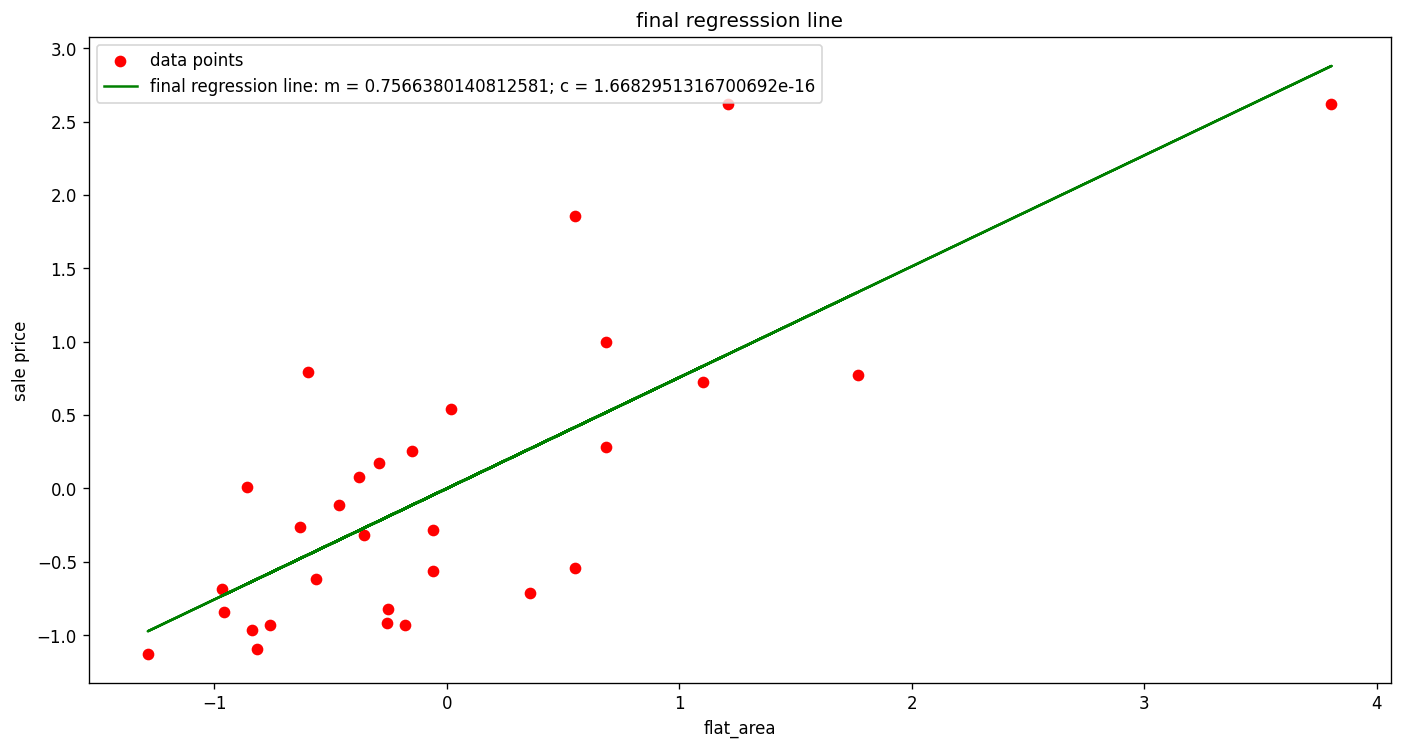

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data["Sale_price"].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data["Flat_Area"].values.reshape(-1,1))

max_iter = 1000
cost_old = 0
alpha = 0.01

m, c = param_int(sale_price)

for i in range(0, max_iter):
    predictions = genarate_pred(m, c, flat_area)

    cost_new = compute_cost(predictions, sale_price)

    if abs(cost_new - cost_old) < 10 **(-7):
        break
    gm, gc = gradients(predictions, sale_price, flat_area)

    m, c = param_update(m, c, gm, gc, alpha)

    if i % 20 == 0:
        print("after Iteration", i, ":m = ", m, ";c = ", c,"; cost= ", cost_new)

    cost_old = cost_new

result(m, c, flat_area, sale_price, cost_new, predictions, i)

# implementation of the linear regression model

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import warnings
warnings.filterwarnings(action = "ignore")
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_test
df = pd.read_csv("Transformed_Housing_Data2.csv")
data = df.copy()

In [36]:
scaler = StandardScaler()
y = data["Sale_Price"]
X = scaler.fit_transform(data.drop(columns = ["Sale_Price"]))
x = pd.DataFrame(data = X, columns = data.drop(columns = ["Sale_Price"]).columns)
x.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [38]:
k = x.corr()
for i in k.columns:
    for j in k.columns:
        if(k.loc[i,j] > abs(0.5))&(i != j):
            print(str(i),str(j))


No of Bedrooms No of Bathrooms
No of Bedrooms Flat Area (in Sqft)
No of Bathrooms No of Bedrooms
No of Bathrooms Flat Area (in Sqft)
No of Bathrooms No of Floors
No of Bathrooms Overall Grade
No of Bathrooms Area of the House from Basement (in Sqft)
No of Bathrooms Living Area after Renovation (in Sqft)
Flat Area (in Sqft) No of Bedrooms
Flat Area (in Sqft) No of Bathrooms
Flat Area (in Sqft) Overall Grade
Flat Area (in Sqft) Area of the House from Basement (in Sqft)
Flat Area (in Sqft) Living Area after Renovation (in Sqft)
Lot Area (in Sqft) Lot Area after Renovation (in Sqft)
No of Floors No of Bathrooms
No of Floors Area of the House from Basement (in Sqft)
Overall Grade No of Bathrooms
Overall Grade Flat Area (in Sqft)
Overall Grade Area of the House from Basement (in Sqft)
Overall Grade Living Area after Renovation (in Sqft)
Area of the House from Basement (in Sqft) No of Bathrooms
Area of the House from Basement (in Sqft) Flat Area (in Sqft)
Area of the House from Basement (in S

In [39]:
#multicolineer 
vif_data = x
VIF = pd.Series([vif_test(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [40]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [41]:
def MC_remover(data):
    vif = pd.Series([vif_test(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
    if vif.max() > 5:
        print([vif[vif == vif.max()].index[0]],"has been removed")
        data = data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print("no more multicolinear")
        return data

In [42]:
for i in range(7):
    vif_data = MC_remover(vif_data)
vif_data.head()


['Flat Area (in Sqft)'] has been removed
['Condition_of_the_House_Fair'] has been removed
no more multicolinear
no more multicolinear
no more multicolinear
no more multicolinear
no more multicolinear


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [43]:
# remaining multicolineer 
VIF = pd.Series([vif_test(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF

No of Bedrooms                               1.638990
No of Bathrooms                              3.373805
Lot Area (in Sqft)                           2.107495
No of Floors                                 2.127703
No of Times Visited                          1.432363
Overall Grade                                2.956967
Area of the House from Basement (in Sqft)    4.580042
Basement Area (in Sqft)                      1.974981
Age of House (in Years)                      2.626504
Latitude                                     2.471343
Longitude                                    1.672667
Living Area after Renovation (in Sqft)       3.063886
Lot Area after Renovation (in Sqft)          2.144068
Years Since Renovation                       2.788064
Condition_of_the_House_Excellent             1.206487
Condition_of_the_House_Good                  1.251488
Condition_of_the_House_Okay                  1.025386
Ever_Renovated_Yes                           2.955539
Waterfront_View_Yes         

# Test and Train data

In [44]:
x = vif_data
y = data["Sale_Price"]

In [45]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.3, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((15126, 28), (6483, 28), (15126,), (6483,))

# linear regression

In [46]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
model = lr.fit(x_train,y_train)


In [47]:
predi = lr.predict(x_test)
lr.score(x_test, y_test)
len(predi)

6483

In [48]:
print("mean absolute error",mean_absolute_error(y_test,predi))

mean absolute error 72311.45974752404


# residual plot optional

In [49]:
residual = predi - y_test
resi_table = pd.DataFrame({"predication":predi,
                          "residual":residual})
resi_table = resi_table.sort_values(by = "predication")

In [50]:
z = [i for i in range(int(resi_table["predication"].max()))]
k = [0 for i in range(int(resi_table["predication"].max()))]

(0.0, 1750000.0)

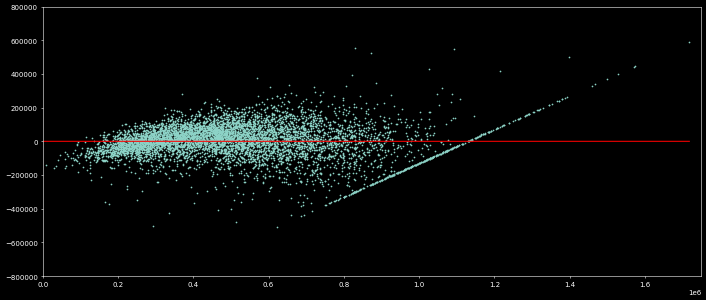

In [51]:
plt.figure(dpi = 50,figsize = (17,7))
plt.scatter(resi_table["predication"],resi_table["residual"],s = 2)
plt.plot(z,k, color = "red")
plt.ylim(-800000,800000)
plt.xlim(0,1750000)

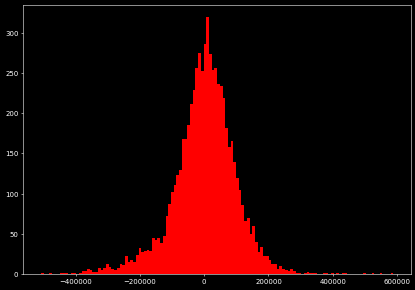

In [52]:
plt.figure(dpi = 50,figsize = (10,7))
plt.hist(resi_table["residual"],color = "red",bins = 130)
plt.show()

# model coefficients

In [53]:
coeff_table = pd.DataFrame({"columns":x_train.columns,"coeff":lr.coef_})
coeff_table = coeff_table.sort_values(by = "coeff")
coeff_table

,columns,coeff
10,Longitude,-23854.326402
13,Years Since Renovation,-10179.085198
0,No of Bedrooms,-3928.662476
12,Lot Area after Renovation (in Sqft),-2896.985429
16,Condition_of_the_House_Okay,-2296.648881
3,No of Floors,2697.552786
15,Condition_of_the_House_Good,5095.976036
18,Waterfront_View_Yes,10761.770079
1,No of Bathrooms,12028.445607
19,Zipcode_Group_Zipcode_Group_1,12165.833721


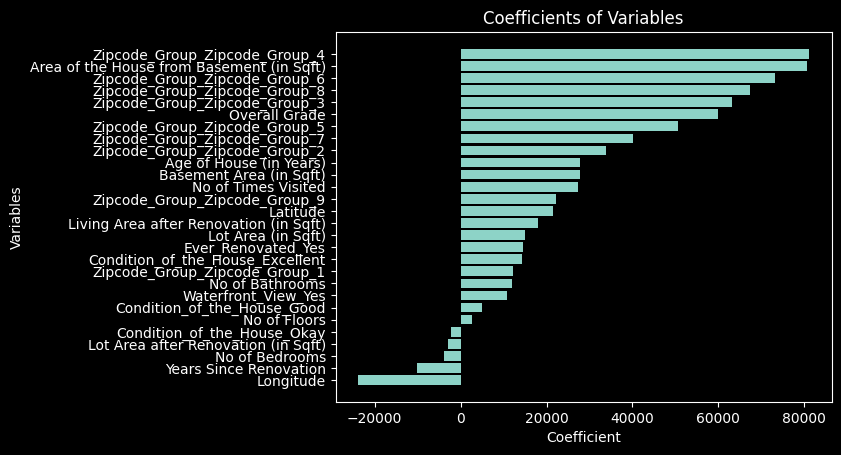

In [54]:
#plt.figure(figsize = (10,5), dpi = 100)
x = coeff_table["columns"]
y = coeff_table["coeff"]
plt.barh(x,y) # histrogram
plt.xlabel("Coefficient")
plt.ylabel("Variables")
plt.title("Coefficients of Variables")
plt.show()

#feature scaling

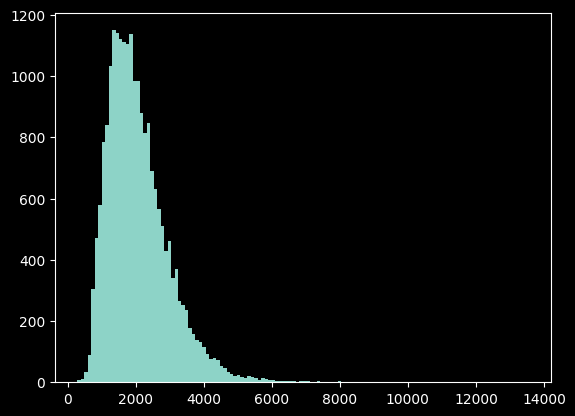

In [55]:
plt.hist(data["Flat Area (in Sqft)"],bins = 130)
plt.show()

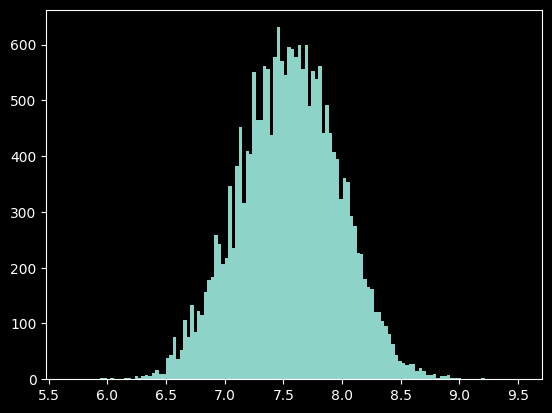

In [56]:
plt.hist(np.log(data["Flat Area (in Sqft)"]),bins = 130)
plt.show()